In [17]:
#Importing required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [18]:
import lxml

In [19]:
#Reading data from website
data= pd.read_html('https://www.citypopulation.de/en/nepal/mun/admin/')

In [33]:
import openpyxl

In [63]:
#Extracting the data in Pandas Data frame
population_data= pd.DataFrame(data[0])

In [64]:
population_data.columns

Index(['Name', 'Status', 'Transcription', 'Native',
       'Population Census 2001-05-28', 'Population Census 2011-06-22',
       'Population Census 2021-11-25', 'Unnamed: 7'],
      dtype='object')

In [65]:
#Selecting only needed data
population_data=population_data[['Name','Status', 'Population Census 2021-11-25']]
population_data.rename(columns={'Population Census 2021-11-25': 'Population'}, inplace=True)

In [74]:
#Filtering rows of data by district
population_data= population_data.loc[population_data['Status'] == "District"]
population_data

,Name,Status,Population
0,Achham,District,228852
12,Arghakhanchi,District,177086
19,Baglung,District,249211
31,Baitadi,District,242157
42,Bajhang,District,189085
...,...,...,...
805,Tanahun,District,321153
816,Taplejung,District,120590
826,Tehrathum,District,88731
833,Udayapur,District,340721


In [175]:
#Loding shapefile of districts
districts=gpd.read_file('hermes_NPL_new_wgs_2.shp')
districts= districts[['DISTRICT', 'geometry']]

In [176]:
# Converting to projection system
districts.to_crs(epsg=32645, inplace= True)
districts.rename(columns={'DISTRICT':'Name'}, inplace= True)
districts

,Name,geometry
0,Bhojpur,"POLYGON ((511090.920 3037605.074, 511096.799 3..."
1,Dhankuta,"POLYGON ((535669.697 3007515.465, 535771.866 3..."
2,Ilam,"POLYGON ((594905.577 2998345.356, 594977.564 2..."
3,Jhapa,"POLYGON ((614788.706 2965417.598, 614846.323 2..."
4,Khotang,"POLYGON ((483944.554 3034135.030, 484149.429 3..."
...,...,...
72,Dadeldhura,"POLYGON ((-112642.731 3271390.308, -112624.143..."
73,Darchula,"POLYGON ((-114388.359 3387958.899, -114269.674..."
74,Doti,"POLYGON ((-89314.072 3269976.788, -89243.682 3..."
75,Kailali,"POLYGON ((-126832.771 3232007.997, -126805.403..."


In [177]:
#Calculating area in new column
districts['Area (Sq. Km)'] = districts.area/1000000


In [178]:
districts=districts.sort_values(by=['Name'])
population_data=population_data.sort_values(by=['Name'])

In [160]:
#Cross checking spelling mistakes in excel
districts['Name'].to_csv('vag.csv')
population_data['Name'].to_csv('ye.csv')

In [179]:
#Correcting spelling mistakes of names  looking at excel
districts.replace('Chitawan','Chitwan',inplace=True)
districts.replace('Dhanusha','Dhanusa', inplace=True)
districts.replace('Rukum East','East Rukum', inplace=True)
districts.replace('Kabhrepalanchok','Kavrepalanchok', inplace=True)
districts.replace('Kapilbastu','Kapilvastu', inplace=True)
districts.replace('Makawanpur','Makwanpur', inplace=True)
districts.replace('Rukum West','West Rukum', inplace=True)
districts.replace('Sindhupalchok','Sindhupalchowk', inplace=True)
districts.replace('Terhathum','Tehrathum', inplace=True)
districts.replace('Dang','Dang Deukhuri', inplace=True)
districts.replace('Tanahu','Tanahun', inplace=True)
population_data.replace('Kanchanpur [Dodhara Chandani]', 'Kanchanpur', inplace=True)
population_data.replace('Nawalpur [Nawalparasi East]', 'Nawalpur', inplace=True)
population_data.replace('Parasi [Nawalparasi West]', 'Parasi', inplace=True)


In [180]:
#Attribute Join
districts= districts.merge(population_data, on='Name')

In [181]:
districts.columns

Index(['Name', 'geometry', 'Area (Sq. Km)', 'Status', 'Population'], dtype='object')

In [182]:
#creating new column for population density
districts['Pop_Density']= districts['Population']/districts['Area (Sq. Km)']

In [189]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<Axes: >

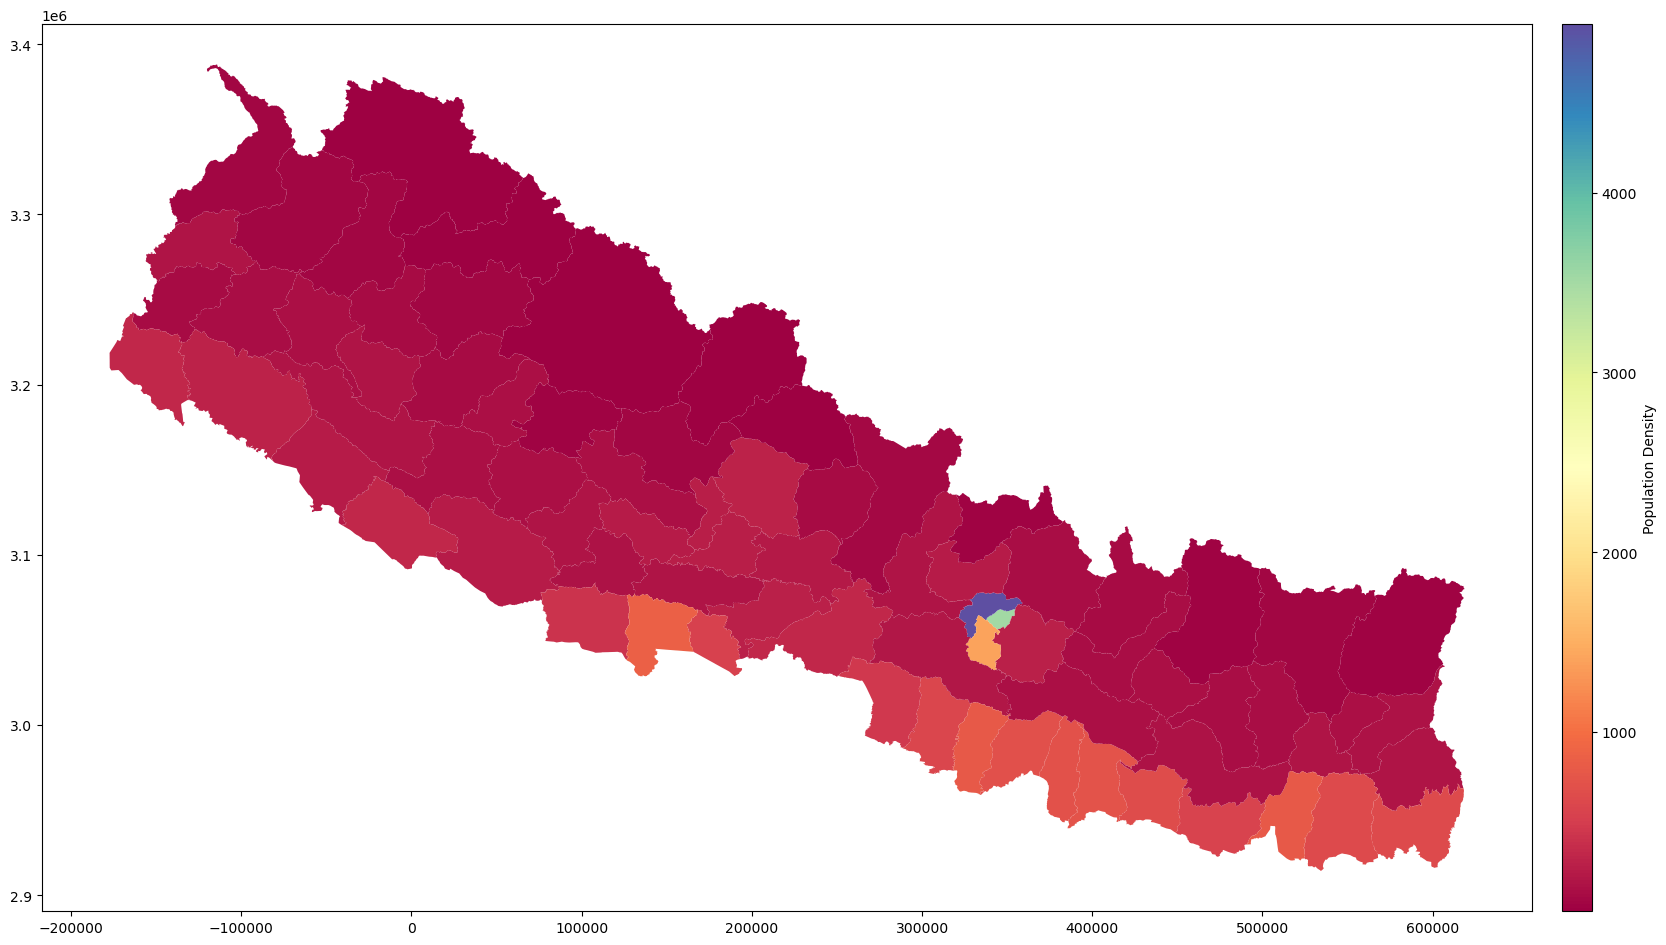

In [199]:
#plotting
fig,ax = plt.subplots(figsize=(20,20))
divider= make_axes_locatable(ax)
cax= divider.append_axes('right', size='2%', pad=0.3)
districts.plot(ax=ax,column='Pop_Density', cmap='Spectral', legend=True, legend_kwds={'label': 'Population Density'}, cax=cax)